In [1]:
import matplotlib.pyplot as plt
plt.style.use(f'./thesis.mplstyle')
import measurement_helper as mhelp
import galsim
import colorcet as cc
import numpy as np
import pickle
import parameter_measurement as pmeasure


## bunch of quick sims to get parameter uncertainties

In [ ]:
params = {'flux': 1e6, 'fwhm':0.6, 'x': -30, 'y': 10, 'g1': .01, 'g2': -0.05,'background':10}
# outlist = pickle.load(open('test_fit_sim_results.p', 'rb'))

# outlist=[]
# for i in range(500):
#     simulated_data = mhelp.zorro_psf_model(params, scale=.01, noise=True)
#     fitparams = mhelp.fit_profile_moments(simulated_data, scale=0.01)
#     outlist.append(fitparams)
# pickle.dump(outlist, open('test_fit_sim_results.p', 'wb'))

In [ ]:
# outlist[0].params

In [ ]:
# f, a = plt.subplots(1,4, figsize=(7.5,3), sharey=True)

# for i, key in enumerate(['fwhm', 'g1', 'g2', 'background']):
#     values = [p.params[key].value for p in outlist]
#     errors = [p.params[key].stderr for p in outlist]
#     print(np.mean(errors))
#     a[i].hist(values, color='lightgrey')
#     a[i].axvline(params[key], color='k')
#     a[i].set_xlabel(key)
# a[0].set_ylabel('\# of simulations');
# plt.savefig('../thesis/param_fit_sim_test.jpg', dpi=150)

## PSF accumulating exposure

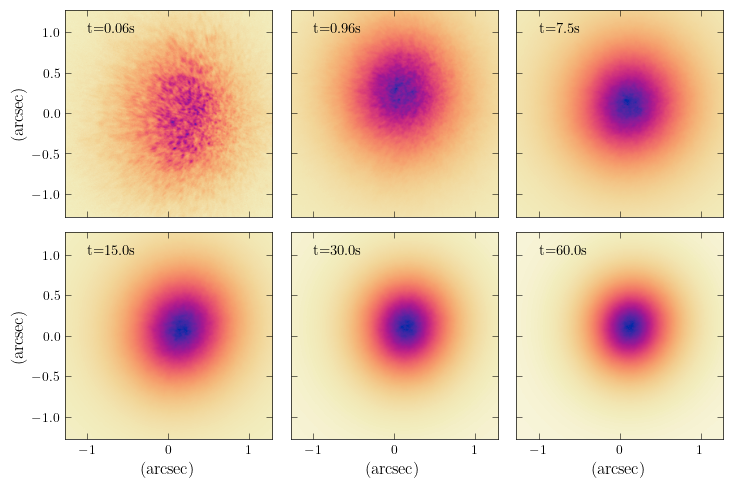

In [2]:
data = pmeasure.ExtractParameters(['/Volumes/My Passport/Zorro/20190720/S20190720Z0992b.fits.bz2'], mask=None)
data_psfs, t,_ = data.accumulate_psf(manual=[int(time/.06 - 1) for time in [.06,1,7.5,15,30,60]])
[(time+1)*.06 for time in t]

f, a = plt.subplots(2,3,sharex=True,sharey=True,figsize=(7.5,5))

for ax, psf, time in zip(a.flatten(), data_psfs, [(time+1)*.06 for time in t]):
    ax.imshow(psf, origin='lower', extent=[-128*.01,128*.01,-128*.01,128*.01], cmap=cc.cm.CET_L17,vmin=0)
    ax.text(-1, 1, f't={time}s', color='k')
    
[ax.set_ylabel('(arcsec)') for ax in a[:,0]]
[ax.set_xlabel('(arcsec)') for ax in a[1]]

plt.savefig('../thesis/psf_accumulating_data.jpg', dpi=150)

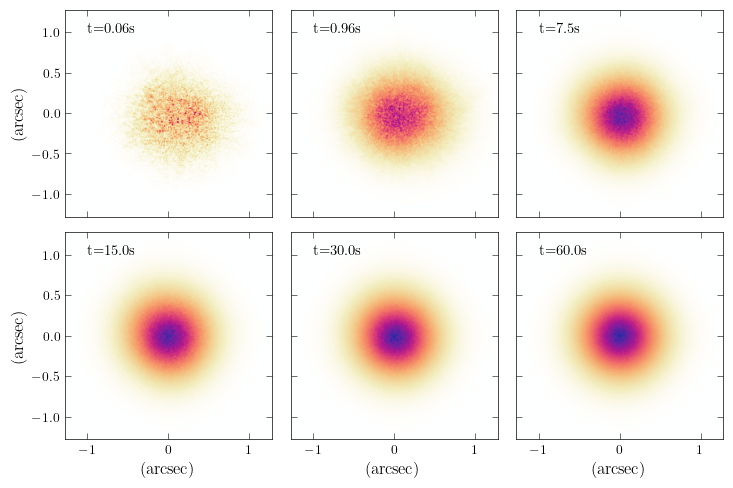

In [2]:
sim = pmeasure.ExtractParameters(['/Users/clairealice/Documents/research/speckles/sim_cubes/sim_562_15.fits'], source='sim', mask=None)
sim_psfs, t,_ = sim.accumulate_psf(manual=[int(time/.06 - 1) for time in [.06,1,7.5,15,30,60]])
[(time+1)*.06 for time in t]

f, a = plt.subplots(2,3,sharex=True,sharey=True,figsize=(7.5,5))

for ax, psf, time in zip(a.flatten(), sim_psfs, [(time+1)*.06 for time in t]):
    ax.imshow(psf, origin='lower', extent=[-128*.01,128*.01,-128*.01,128*.01], cmap=cc.cm.CET_L17,vmin=0)
    ax.text(-1, 1, f't={time}s', color='k')
    
[ax.set_ylabel('(arcsec)') for ax in a[:,0]]
[ax.set_xlabel('(arcsec)') for ax in a[1]]

plt.savefig('../thesis/psf_accumulating_sim.jpg', dpi=150)

## demonstrate Gaussian and Kolmogorov fits on data and sim

In [3]:
def model_comparison(kind, psf, g_model, k_model, v_model, g_pull, k_pull, v_pull):
    f, a = plt.subplots(2,4, figsize=(7.5,4), sharex=True, gridspec_kw={'wspace':0})#, sharey='col')

    vmax_img = np.max([psf, g_model, k_model, v_model])

    vmin_pull = np.min([g_pull, k_pull, v_pull])
    vmax_pull = np.max([g_pull, k_pull, v_pull])
    vmax_pull = np.max([abs(vmin_pull), vmax_pull])


    for short, ax in zip([psf, g_model, k_model, v_model], a[0]):
        m = ax.imshow(short, origin='lower', extent=[-128*.01,128*.01,-128*.01,128*.01], 
                      cmap=cc.cm.CET_L17, vmin=0, vmax=vmax_img)
    plt.colorbar(m, ax=a[0,-1], label='counts (e-)')

    for pull, ax in zip([g_pull, k_pull, v_pull], a[1,1:]):
        m = ax.imshow(pull, origin='lower', extent=[-128*.01,128*.01,-128*.01,128*.01], 
                         cmap=cc.cm.CET_D7 , vmin=-vmax_pull, vmax=vmax_pull)
    plt.colorbar(m, ax=a[1,-1], label=r'pull')

    a[1,0].axis('off')
    [ax.set_yticklabels([]) for ax in [a[0,1], a[0,-1],a[-1,-1]]]

    [ax.set_xlabel('(arcsec)') for ax in a[-1]]
    [ax.set_ylabel('(arcsec)') for ax in [a[0,0], a[1,1]]];

    a[0,0].set_title('data (1 sec)')
    a[0,1].set_title('Gaussian model')
    a[0,2].set_title('Kolmogorov model');
    a[0,3].set_title('von Karman model');
    plt.savefig(f'../thesis/model_1s_{kind}.jpg', dpi=150)

### Data

In [ ]:
# from astropy.io import fits
# import numpy as np

# fpath = '/Volumes/My Passport/Zorro/20190720/S20190720Z0992b.fits.bz2'
# hdu = fits.open(fpath)
# header = hdu[0].header
# # images = hdu[0].data.astype(np.float64)
# hdu.close()

# frame = np.random.choice(np.arange(1000))
# total_gain = header['EMGAIN'] / header['PREAMP']

# full_psf = data_psfs[-1] #/ total_gain
# short_psf = data_psfs[1] #/ total_gain

In [5]:
k_full_fit = mhelp.fit_profile_moments(data_psfs[-1], scale=0.01)
print('kolmogorov fit done')
g_full_fit = mhelp.fit_profile_moments(data_psfs[-1], scale=0.01, profile='Gaussian')
print('gaussian fit done')
v_full_fit = mhelp.fit_profile_moments(data_psfs[-1], scale=0.01, profile='vonKarman')
print('von karman fit done')

k_short_fit = mhelp.fit_profile_moments(data_psfs[1], scale=0.01)
print('kolmogorov fit done')
g_short_fit = mhelp.fit_profile_moments(data_psfs[1], scale=0.01, profile='Gaussian')
print('gaussian fit done')
v_short_fit = mhelp.fit_profile_moments(data_psfs[1], scale=0.01, profile='vonKarman')
print('von karman fit done')

k_full_model = mhelp.zorro_psf_model(k_full_fit.params, scale=.01)
g_full_model = mhelp.zorro_psf_model(g_full_fit.params, scale=.01, profile='Gaussian')
v_full_model = mhelp.zorro_psf_model(v_full_fit.params, scale=.01, profile='vonKarman')

k_short_model = mhelp.zorro_psf_model(k_short_fit.params, scale=.01)
g_short_model = mhelp.zorro_psf_model(g_short_fit.params, scale=.01, profile='Gaussian')
v_short_model = mhelp.zorro_psf_model(v_short_fit.params, scale=.01, profile='vonKarman')

k_short_pull = (k_short_model - data_psfs[1]) / np.sqrt(data_psfs[1])
g_short_pull = (g_short_model - data_psfs[1]) / np.sqrt(data_psfs[1])
v_short_pull = (v_short_model - data_psfs[1]) / np.sqrt(data_psfs[1])

k_full_pull = (k_full_model - data_psfs[-1]) / np.sqrt(data_psfs[-1])
g_full_pull = (g_full_model - data_psfs[-1]) / np.sqrt(data_psfs[-1])
v_full_pull = (v_full_model - data_psfs[-1]) / np.sqrt(data_psfs[-1])

kolmogorov fit done
gaussian fit done


/Users/clairealice/anaconda3/lib/python3.7/site-packages/pynverse/inverse.py:188: RuntimeWarning: Trouble calculating inverse for values: [0.86506862]
  "%s" % str(yin[~resultsmask]), RuntimeWarning)
/Users/clairealice/anaconda3/lib/python3.7/site-packages/pynverse/inverse.py:196: RuntimeWarning: Results obtained with less than 2 decimal digits of accuracy
  % accuracy, RuntimeWarning)
/Users/clairealice/anaconda3/lib/python3.7/site-packages/galsim/errors.py:420: GalSimWarning: VonKarman delta-function component is larger than maxk_threshold.  Please see docstring for information about this component and how to toggle it.
  warnings.warn(message, GalSimWarning)
/Users/clairealice/anaconda3/lib/python3.7/site-packages/pynverse/inverse.py:188: RuntimeWarning: Trouble calculating inverse for values: [0.85281426]
  "%s" % str(yin[~resultsmask]), RuntimeWarning)
/Users/clairealice/anaconda3/lib/python3.7/site-packages/pynverse/inverse.py:196: RuntimeWarning: Results obtained with less than 

GalSimError: Bad integrand behavior found in the integration interval in intGKP

In [7]:
g_full_fit

In [ ]:
g_short_fit.params

In [ ]:
model_comparison('data', data_psfs[1], g_short_model, k_short_model, v_short_model, 
                 g_short_pull, k_short_pull, v_short_pull)

In [6]:
model_comparison('data', data_psfs[-1], g_full_model, k_full_model, v_full_model, 
                 g_full_pull, k_full_pull, v_full_pull)

NameError: name 'g_full_model' is not defined

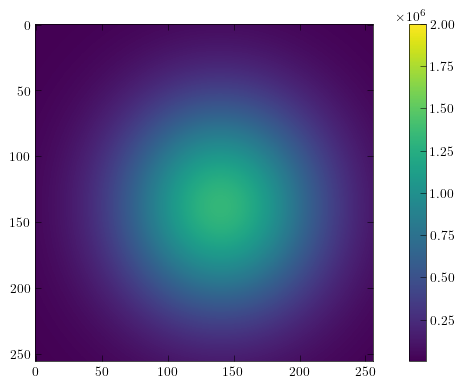

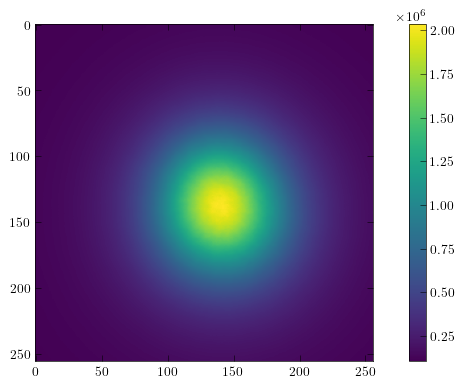

In [11]:
plt.imshow(mhelp.zorro_psf_model(g_full_fit.params, scale=.01, profile='Gaussian'), vmax=2e6)
plt.colorbar()
plt.show()
plt.imshow(data_psfs[-1])
plt.colorbar()


### Sim

In [ ]:
# fpath = '/Users/clairealice/Documents/research/speckles/sim_cubes/sim_562_15.fits'
# hdu = fits.open(fpath)
# header = hdu[0].header
# sims = hdu[0].data.astype(np.float64)
# hdu.close()

# frame = np.random.choice(np.arange(1000))

# full_psf_sim = np.mean(sims, axis=0) * 1e6
# short_psf_sim = np.mean(sims[frame:frame+16], axis=0) * 1e6

In [ ]:
# plt.imshow(short_psf_sim,origin='lower')
# plt.colorbar()

In [4]:
k_full_fit_sim = mhelp.fit_profile_moments(sim_psfs[-1], scale=0.01)
g_full_fit_sim = mhelp.fit_profile_moments(sim_psfs[-1], scale=0.01, profile='Gaussian')
v_full_fit_sim = mhelp.fit_profile_moments(sim_psfs[-1], scale=0.01, profile='vonKarman')

k_short_fit_sim = mhelp.fit_profile_moments(sim_psfs[1], scale=0.01)
g_short_fit_sim = mhelp.fit_profile_moments(sim_psfs[1], scale=0.01, profile='Gaussian')
# v_short_fit_sim = mhelp.fit_profile_moments(sim_psfs[1], scale=0.01, profile='vonKarman')

k_full_model_sim = mhelp.zorro_psf_model(k_full_fit_sim.params, scale=.01)
g_full_model_sim = mhelp.zorro_psf_model(g_full_fit_sim.params, scale=.01, profile='Gaussian')
v_full_model_sim = mhelp.zorro_psf_model(v_full_fit_sim.params, scale=.01, profile='vonKarman')

k_short_model_sim = mhelp.zorro_psf_model(k_short_fit_sim.params, scale=.01)
g_short_model_sim = mhelp.zorro_psf_model(g_short_fit_sim.params, scale=.01, profile='Gaussian')
# v_short_model_sim = mhelp.zorro_psf_model(v_short_fit_sim.params, scale=.01, profile='vonKarman')

k_short_pull_sim = (k_short_model_sim - sim_psfs[1]) / np.sqrt(sim_psfs[1])
g_short_pull_sim = (g_short_model_sim - sim_psfs[1]) / np.sqrt(sim_psfs[1])
# v_short_pull_sim = (v_short_model_sim - sim_psfs[1]) / np.sqrt(sim_psfs[1])

k_full_pull_sim = (k_full_model_sim - sim_psfs[-1]) / np.sqrt(sim_psfs[-1])
g_full_pull_sim = (g_full_model_sim - sim_psfs[-1]) / np.sqrt(sim_psfs[-1])
v_full_pull_sim = (v_full_model_sim - sim_psfs[-1]) / np.sqrt(sim_psfs[-1])

In [5]:
v_full_fit_sim.params

name,value,standard error,relative error,initial value,min,max,vary
flux,9.9848e+08,784177.864,(0.08%),995153072.9683266,100.000000,1.0000e+12,True
fwhm,0.64830926,5.2431e-04,(0.08%),0.5,0.10000000,2.50000000,True
x,0.07430038,0.02312533,(31.12%),0,-100.000000,100.000000,True
y,-1.20246297,0.02267466,(1.89%),0,-100.000000,100.000000,True
g1,0.00875382,4.1883e-04,(4.78%),0,-0.50000000,0.50000000,True
g2,-6.2565e-04,2.8573e-04,(45.67%),0,-0.50000000,0.50000000,True
background,-99.9960988,3.35959906,(3.36%),0,-100.000000,500.000000,True
L0,240.422264,22.3486253,(9.30%),20,1.00000000,250.000000,True


In [ ]:
model_comparison('sim', sim_psfs[1], g_short_model_sim, k_short_model_sim, v_short_model_sim,  
                 g_short_pull_sim, k_short_pull_sim, v_short_pull_sim)

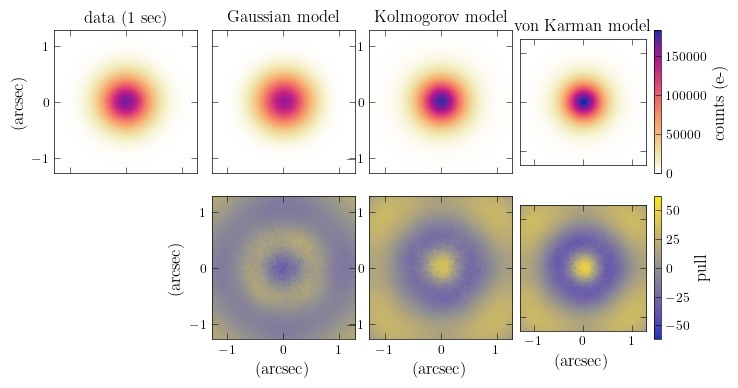

In [6]:
model_comparison('sim', sim_psfs[-1], g_full_model_sim, k_full_model_sim, v_full_model_sim, 
                 g_full_pull_sim, k_full_pull_sim, v_full_pull_sim)

### Profile comparison

In [ ]:
f,a = plt.subplots(2,1,figsize=(7.5,5),sharex=True)

a[0].errorbar(np.arange(-128,128)*0.01, data_psfs[1][128], yerr=np.sqrt(data_psfs[1][128]), 
               color='grey', fmt='o', ms=2, label='data')
a[0].plot(np.arange(-128,128)*0.01, g_short_model[128], lw=1.5, color='brown', label='Gaussian model')
a[0].plot(np.arange(-128,128)*0.01, k_short_model[128], lw=1.5, color='teal', label='Kolmogorov model')
a[0].legend(title='1s')

a[1].errorbar(np.arange(-128,128)*0.01, data_psfs[-1][128], yerr=np.sqrt(data_psfs[-1][128]), 
               color='grey', fmt='o', ms=2, label='data')
a[1].plot(np.arange(-128,128)*0.01, g_full_model[128], lw=1.5, color='brown', label='Gaussian model')
a[1].plot(np.arange(-128,128)*0.01, k_full_model[128], lw=1.5, color='teal', label='Kolmogorov model')
a[1].legend(title='60s')

a[1].set_xlim(-1.28,1.28)
a[1].set_xlabel('(arcsec)')
[ax.set_ylabel('counts (e-)') for ax in a]
plt.savefig('../thesis/model_profiles_data.jpg', dpi=150)

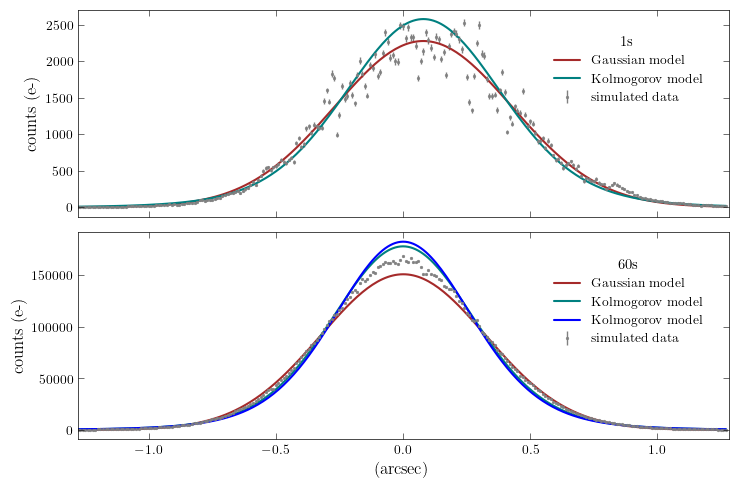

In [7]:
f,a = plt.subplots(2,1,figsize=(7.5,5),sharex=True)

a[0].errorbar(np.arange(-128,128)*0.01, sim_psfs[1][128], yerr=np.sqrt(sim_psfs[1][128]), 
               color='grey', fmt='o', ms=2, label='simulated data')
a[0].plot(np.arange(-128,128)*0.01, g_short_model_sim[128], lw=1.5, color='brown', label='Gaussian model')
a[0].plot(np.arange(-128,128)*0.01, k_short_model_sim[128], lw=1.5, color='teal', label='Kolmogorov model')
a[0].legend(title='1s')

a[1].errorbar(np.arange(-128,128)*0.01, sim_psfs[-1][128], yerr=np.sqrt(sim_psfs[-1][128]), 
               color='grey', fmt='o', ms=2, label='simulated data')
a[1].plot(np.arange(-128,128)*0.01, g_full_model_sim[128], lw=1.5, color='brown', label='Gaussian model')
a[1].plot(np.arange(-128,128)*0.01, k_full_model_sim[128], lw=1.5, color='teal', label='Kolmogorov model')
a[1].plot(np.arange(-128,128)*0.01, v_full_model_sim[128], lw=1.5, color='b', label='Kolmogorov model')
a[1].legend(title='60s')

a[1].set_xlim(-1.28,1.28)
a[1].set_xlabel('(arcsec)')
[ax.set_ylabel('counts (e-)') for ax in a]
plt.savefig('../thesis/model_profiles_sim.jpg', dpi=150)